# 2nova EDA, RFM and FMR Analysis
## Goods
Посмотрим на данные, содержащие информацию о товарах.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

goods = pd.read_csv('goods.csv', sep=';')

print('Size of the data set: {} rows and {} columns'.format(*goods.shape))
goods.head()

Size of the data set: 34316 rows and 5 columns


,id,name,price,oldPrice,visible
0,617,Носки детские,69.0,69.0,0.0
1,618,Рейтузы детские для девочек,349.0,449.0,0.0
2,686,Трусы детские для девочек 3шт,249.0,249.0,0.0
3,687,Трусы детские для девочек 3шт,249.0,249.0,0.0
4,688,Трусы детские для девочек 2шт,199.0,299.0,0.0


Посчитаем количество отсутствующих значений в данных.

In [3]:
for col in goods.columns:
    print('{} missing values in {} column'.format(goods[col].isnull().sum().sum(), col))

0 missing values in id column
1 missing values in name column
1 missing values in price column
1 missing values in oldPrice column
1 missing values in visible column


Удалим строки, содержащие отсутствующие значения.

In [4]:
goods.dropna(inplace=True)
print('Size of the data set: {} rows and {} columns'.format(*goods.shape))

Size of the data set: 34315 rows and 5 columns


Построим граф распределения цен товаров. 

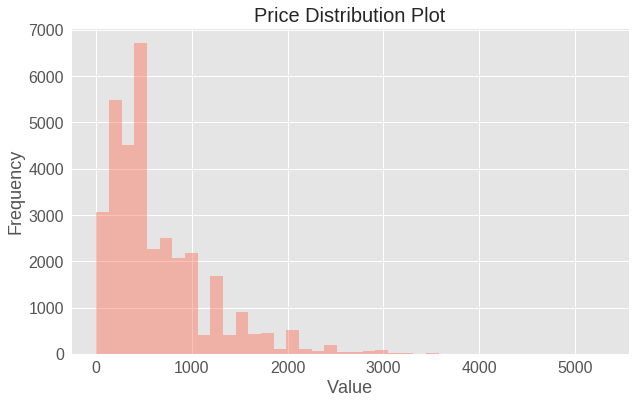

min: 0.0, max: 5299.0, mean: 632.85, std: 529.31


In [14]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(goods.price, bins=40, kde=False, color='tomato')

plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Price Distribution Plot', fontsize=20)
plt.show()

print('min: {}, max: {}, mean: {:.2f}, std: {:.2f}'.format(
    min(goods.price), max(goods.price), goods.price.mean(), goods.price.std()))

Посчитаем количество уникальных товаров.

In [16]:
goods.name.unique().shape

(5319,)

## Order goods
Посмотрим на данные, содержащие информацию о заказах этих товаров.

In [5]:
order_goods = pd.read_csv('order-goods.csv', sep=';', 
                          encoding='ISO-8859-1', dtype={'price': 'object'})

order_goods.price = order_goods.price.apply(lambda x: float((str(x).replace(' ', ''))))

print('Size of the data set: {} rows and {} columns'.format(*order_goods.shape))
order_goods.head()

Size of the data set: 897933 rows and 7 columns


,orderId,goodId,size,qty,price,originalPrice,originalOldPrice
0,451752.0,37101.0,70B,2.0,1.0,499.0,1099.0
1,451752.0,37129.0,S,2.0,499.0,499.0,0.0
2,451752.0,42809.0,one size,1.0,1.0,399.0,0.0
3,451752.0,37101.0,75C,1.0,499.0,499.0,1099.0
4,451752.0,42784.0,S,1.0,1.0,499.0,0.0


Посчитаем количество отсутствующих значений в данных.

In [6]:
for col in order_goods.columns:
    print('{} missing values in {} column'.format(order_goods[col].isnull().sum().sum(), col))

3889 missing values in orderId column
1 missing values in goodId column
1 missing values in size column
1 missing values in qty column
1 missing values in price column
1 missing values in originalPrice column
1 missing values in originalOldPrice column


Удалим строки, содержащие отсутствующие значения.

In [7]:
# order_goods[pd.isnull(order_goods.orderId) == True].head()
order_goods.dropna(inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*order_goods.shape))

Size of the data set: 894044 rows and 7 columns


Построим граф распределения цен, за которые товар в итоге был приобретен. 

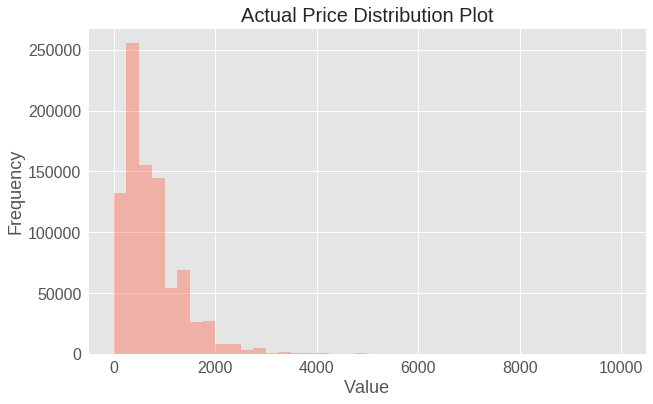

min: 0.0, max: 9999.0, mean: 769.09, std: 597.23


In [35]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(order_goods.price, bins=40, kde=False, color='tomato')

plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Actual Price Distribution Plot', fontsize=20)
plt.show()

print('min: {}, max: {}, mean: {:.2f}, std: {:.2f}'.format(
    min(order_goods.price), max(order_goods.price), order_goods.price.mean(), order_goods.price.std()))

Посмотрим на структуру заказов.

In [8]:
order_goods.groupby(order_goods.columns.tolist(), as_index=False).size().head(10)

orderId   goodId   size  qty  price   originalPrice  originalOldPrice
173042.0  19546.0  146   1.0  599.0   299.0          599.0               1
          19549.0  140   1.0  599.0   299.0          599.0               1
          23192.0  140   1.0  599.0   599.0          0.0                 1
          23206.0  140   1.0  1499.0  599.0          1499.0              1
          23223.0  146   1.0  699.0   499.0          699.0               1
173043.0  21131.0  XS    2.0  1499.0  1499.0         1999.0              1
          21733.0  L     1.0  199.0   199.0          299.0               1
173044.0  21132.0  M     1.0  1499.0  1499.0         1999.0              1
173045.0  21133.0  S     1.0  399.0   299.0          599.0               1
          21681.0  S     1.0  999.0   499.0          999.0               1
dtype: int64

## Orders
Посмотрим на данные, содержащие информацию о заказах.

In [37]:
orders = pd.read_csv('orders.csv', sep=';', dtype={'erp_status': 'object'})

orders.accept_time = pd.to_datetime(orders.accept_time)

print('Size of the data set: {} rows and {} columns'.format(*orders.shape))
orders.head()

Size of the data set: 174063 rows and 9 columns


,id,from_site,status,payment_type,payed,accept_time,total_cost,user_id,erp_status
0,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-
1,451751.0,inflin,6.0,cash,0.0,2017-05-31 23:44:14,2200.0,82507.0,-
2,451750.0,concept,6.0,cash,0.0,2017-05-31 23:39:14,6000.0,316491.0,-
3,451749.0,acoola,6.0,cash,0.0,2017-05-31 23:37:19,2101.0,336144.0,-
4,451746.0,concept,6.0,cash,0.0,2017-05-31 23:27:22,6300.0,332755.0,-


Посчитаем количество отсутствующих значений в данных и удалим строки, содержащие эти значения.

In [38]:
for col in orders.columns:
    print('{} missing values in {} column'.format(orders[col].isnull().sum().sum(), col))

1371 missing values in id column
1 missing values in from_site column
1 missing values in status column
74 missing values in payment_type column
1 missing values in payed column
1 missing values in accept_time column
1 missing values in total_cost column
1 missing values in user_id column
1 missing values in erp_status column


In [39]:
orders.dropna(inplace=True)
print('Size of the data set: {} rows and {} columns'.format(*orders.shape))

Size of the data set: 172619 rows and 9 columns


Посмотрим на статусы заказов, где заказ:
* 3 - оплачен, формируется к отправке
* 5 - отменен
* 6 - отправлен 
* 7 - продажа оформлена

In [40]:
orders.status.value_counts()

6.0    148032
5.0     24540
3.0        43
7.0         4
Name: status, dtype: int64

In [41]:
orders.payment_type.unique()

array(['cash', 'visa', 'qiwi', 'yandex', 'pickpoint'], dtype=object)

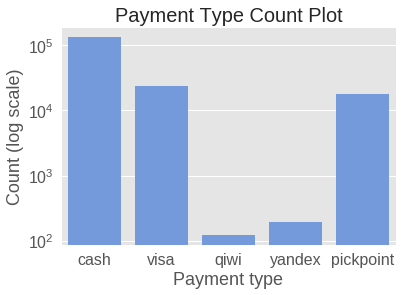

In [52]:
plt.figure(figsize=(6,4))
plt.tick_params(labelsize=16)

sns.countplot(orders.payment_type, color='cornflowerblue').set(yscale='log')

plt.xlabel('Payment type', fontsize=18)
plt.ylabel('Count (log scale)', fontsize=18)
plt.title('Payment Type Count Plot', fontsize=20)
plt.show()

## RFM analysis
Сформируем сводную таблицу данных (только значения заказов со статусом 6).

In [54]:
orders[orders.status == 6].shape

(148032, 9)

In [55]:
order_goods.rename(columns={'orderId': 'order_id'}, inplace=True)
orders.rename(columns={'id': 'order_id'}, inplace=True)

In [56]:
data = pd.merge(orders[orders.status == 6], order_goods, how='inner', on='order_id')

print('Size of the data set: {} rows and {} columns'.format(*data.shape))
data.head()

Size of the data set: 585924 rows and 15 columns


,order_id,from_site,status,payment_type,payed,accept_time,total_cost,user_id,erp_status,goodId,size,qty,price,originalPrice,originalOldPrice
0,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101.0,70B,2.0,1.0,499.0,1099.0
1,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37129.0,S,2.0,499.0,499.0,0.0
2,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,42809.0,one size,1.0,1.0,399.0,0.0
3,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101.0,75C,1.0,499.0,499.0,1099.0
4,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,42784.0,S,1.0,1.0,499.0,0.0


## RFM table

In [59]:
import datetime as dt

now = dt.datetime(2017, 5, 31)

In [60]:
rfm_table = data.groupby('user_id').agg({'accept_time': lambda x: (now - x.max()).days, 
                                         'order_id': lambda x: len(x),
                                         'price': lambda x: x.sum()})

rfm_table.rename(columns={'accept_time': 'recency', 
                          'order_id': 'frequency', 
                          'price': 'monetary_value'}, inplace=True)
rfm_table.head()

,monetary_value,recency,frequency
user_id,,,
48.0,21541.0,76,19.0
70.0,6308.0,307,7.0
102.0,8804.0,446,6.0
144.0,3912.0,423,3.0
151.0,1699.0,157,3.0


In [61]:
data.price[data.user_id == 70.0].sum()

6308.0

In [62]:
data.order_id[data.user_id == 70.0].count()

7

In [63]:
(now - dt.datetime(2016, 7, 27)).days

308

## RFM Quartiles

In [21]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,90.0,2.0,2000.0
0.50,228.0,5.0,3600.0
0.75,483.0,10.0,7893.0


In [22]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 2.0, 0.5: 5.0, 0.75: 10.0},
 'monetary_value': {0.25: 2000.0, 0.5: 3600.0, 0.75: 7893.0},
 'recency': {0.25: 90.0, 0.5: 228.0, 0.75: 483.0}}

## RFM segmentation table

In [23]:
rfm_segmentation = rfm_table

In [30]:
quantiles['recency'][0.25]

90.0

In [24]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [33]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RClass, args=('recency', quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMClass, args=('frequency', quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(FMClass, args=('monetary_value', quantiles))

In [34]:
rfm_segmentation['RFMClass'] = rfm_segmentation.R_Quartile.map(str) \
                             + rfm_segmentation.F_Quartile.map(str) \
                             + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
48.0,76,19.0,21541.0,1,1,1,111
70.0,307,7.0,6308.0,3,2,2,322
102.0,446,6.0,8804.0,3,2,1,321
144.0,423,3.0,3912.0,3,3,2,332
151.0,157,3.0,1699.0,2,3,4,234


## Top 5 best customers

In [27]:
rfm_segmentation[rfm_segmentation['rfm_class']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
294075.0,18,873.0,923006.0,1,1,1,111
62795.0,33,622.0,514266.0,1,1,1,111
224807.0,2,856.0,508367.0,1,1,1,111
92996.0,13,581.0,439436.0,1,1,1,111
296914.0,9,822.0,397398.0,1,1,1,111


In [28]:
data.price[data.user_id == 294075.0].sum()

923006.0